<a href="https://colab.research.google.com/github/cesartaker/Machine-Learning-Proyects/blob/main/Proyecto-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###UNIVERSIDAD CATÓLICA ANDRÉS BELLO.
###FACULTAD DE INGENIERÍA
###DEPARTAMENTO DE FÍSICA
###ESCUELA DE INGENIERÍA EN INFORMÁTICA

  *PROYECTO 1: EL PERCEPTRÓN SIMPLE*
  
  *Desarrollado por Cesar Baute*



# **1.   Clasificación Binaria**

  ***1.1 Cargue el conjunto de datos ”wine” de scikit-learn.***



In [ ]:
import numpy as np                       # NumPy es una librería de Python especializada en el cálculo numérico y el análisis de datos.
import pandas as pd                      # Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
import seaborn as sns                    # Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib.
from sklearn import datasets             # Herramientas simples y eficientes para el análisis predictivo de datos.
import matplotlib.pyplot as plt          # Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python..
from sklearn.model_selection import train_test_split # Herramienta que permite segmentar las data en conjuntos

In [ ]:
#Importa el conjunto "wine" de scikit-learn
from sklearn.datasets import load_wine
wine_data_set = load_wine()



In [ ]:
#Creamos un DataFrame de Pandas a partir del dataset "Wine"
data= pd.DataFrame(data = np.c_[wine_data_set['data'], wine_data_set['target']], columns=wine_data_set['feature_names'] + ['target'])

#Mostramos nuestro DataFrame
data



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


***1.2 Seleccione las caracteristicas: ”alcohol”, ”magnesium” y ”color intensity”.***

***1.3 Seleccione entre los datos anteriores, dos tipos de vino que le permitan realizar una clasificación binaria.***

In [ ]:
# Seleccionamos dos tipos de vinos de los 3 posibles en el dataset (0, 1, 2)
datafocus= data[data['target'].isin([1, 2])]

#Seleccionamos las características indicadas
datafocus = datafocus[['alcohol','magnesium','color_intensity','target']]

***1.4 Divida la data en dos subconjuntos: uno de entrenamiento y uno de prueba.***

In [ ]:

# Dividimos el DataFrame en conjuntos de entrenamiento y validacion
train_data, validation_data = train_test_split(datafocus, test_size=0.1, random_state = 42 )

# Extraemos los valores de las columnas para posteriormente normalizarlos
normalized_train_data = train_data[['alcohol','magnesium','color_intensity']]
normalized_val_data = validation_data[['alcohol','magnesium','color_intensity']]

# Normalizamos la data
normalized_train_data = (normalized_train_data-normalized_train_data.mean()/normalized_train_data.std())
normalized_val_data =(normalized_val_data - normalized_val_data.mean()/ normalized_val_data.std())

#Ajustamos la data de los conjuntos imagen
train_data['target'] = train_data['target'].replace(2, 0)
validation_data['target'] = validation_data['target'].replace(2,0)

Y_TRAIN = train_data['target'].values
Y_VALIDATION = validation_data['target'].values

normalized_train_data['target'] = Y_TRAIN
normalized_val_data['target'] = Y_VALIDATION




***1.5 Usando los datos de entrenamiento, implemente un clasificador binario, basado en el algoritmo del Perceptrón Simple.***

In [ ]:
from ast import While
import random
# Definimos los hiperparámetros
alpha = 0.0001 #Tasa o constante de aprendizaje
b = 1 #Bias
epocas = 2500 # Número de veces que el algoritmo de aprendizaje recorrerá todo el conjunto de datos durante su entrenamiento

# Pesos iniciales
W1 = random.uniform(-1, 1) #Generado de forma aleatoria usando random
W2 = random.uniform(-1, 1) #Generado de forma aleatoria usando random
W3 = random.uniform(-1, 1) #Generado de forma aleatoria usando random

# Función Heaviside
def heaviside(valor):
    if valor >= 0:
        return 1
    else:
        return 0

# Funcion para calculo del error
def errorP(Y_ESPERADA, Y_OBTENIDA):
  return (Y_ESPERADA-Y_OBTENIDA)


def recalcular_peso(Wi,Xi,alpha,y_obtenida, y_esperada):
  Wi += -alpha*(y_obtenida-y_esperada)*Xi
  return Wi

def recalcular_sesgo(b,alpha,y_obtenida, y_esperada):
  return (b-alpha*(y_obtenida-y_esperada))


def entrenar_perceptron(train_data,alpha,W1,W2,W3,b,epocas):
  hubo_error = True

  for i in range(epocas):
    for n in range(train_data.shape[0]):
      X1 = train_data.iat[n,0]
      X2 = train_data.iat[n,1]
      X3 = train_data.iat[n,2]

      # calculo de la SUMATORIA
      S = b + X1*W1 + X2*W2 + X3*W3

      # calculo de Y aplicando la FUNCION DE ACTIVACIÓN
      y_obtenida = heaviside(S)

      #SE EXTRAE LA Y QUE SE ESPERA
      y_esperada = train_data.iat[n,3]

     # SE CALCULA EL ERROR
      error = errorP(y_esperada,y_obtenida)

     # CADA VEZ QUE EL ERROR ES DISTINTO DE 0 SE RECALCULAN Y ACTUALIZAN LOS PESOS Y EL SESGO
      if error != 0:
        W1 = recalcular_peso(W1,X1,alpha,y_obtenida,y_esperada)
        W2 = recalcular_peso(W2,X2,alpha,y_obtenida,y_esperada)
        W3 = recalcular_peso(W3,X3,alpha,y_obtenida,y_esperada)
        b = recalcular_sesgo(b,alpha,y_obtenida,y_esperada)


  return b, W1, W2, W3


b, W1, W2, W3 = entrenar_perceptron(normalized_train_data,alpha,W1,W2,W3,b,epocas)



print(f'B: {b}')
print(f'w1: {W1}')
print(f'w2: {W2}')
print(f'w3: {W3}\n')




B: 1.0560999999999938
w1: -0.2677839374210057
w2: 0.0008416032314353152
w3: -0.6983594274733274



***1.6 Usando los datos de prueba evalue el desempeño del algoritmo y represente el desempeño utilizando una matriz de confusión***

In [ ]:
# Validamos

def predecir(validation_data,alpha,W1,W2,W3,b):
  y_pred=[]
  for n in range(validation_data.shape[0]):
      X1 = validation_data.iat[n,0]
      X2 = validation_data.iat[n,1]
      X3 = validation_data.iat[n,2]
      sumatoria = b + X1*W1 + X2*W2 + X3*W3
      y_pred.append(heaviside(sumatoria))
  return y_pred

y_pred = predecir(normalized_val_data,alpha,W1,W2,W3,b)
print(f'y_pred: {y_pred}')
print(f'y_vali: {Y_VALIDATION}')

y_pred: [1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
y_vali: [1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.]


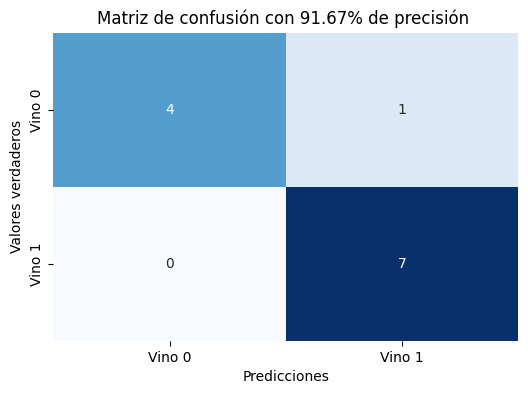

In [ ]:
#Calculo de la precisión

accurary = accuracy_score(Y_VALIDATION,y_pred)

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_VALIDATION,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Vino 0", "Vino 1"], yticklabels=["Vino 0", "Vino 1"])
plt.title(f'Matriz de confusión con {accurary* 100:.2f}% de precisión ')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()

***1.7 Use un clasificador binario basado en el perceptrón simple de scikit-learn y compare su calidad con la obtenida anteriormente***

In [ ]:
from sklearn.linear_model import Perceptron

# CREAMOS EL PERCEPTRÓN
perceptron = Perceptron(max_iter=2500, eta0=0.0001,random_state=42) #ASIGNAMOS LOS MISMOS VALORES QUE EN LA IMPLEMENTACION ANTERIOR

# SELECCIONAMOS LA DATA DE ENTRENAMIENTO Y VALIDACION DEL PERCEPTRÓN
x_t_data = normalized_train_data[['alcohol','magnesium','color_intensity']]
y_t_data = normalized_train_data['target']

x_val_data = normalized_val_data[['alcohol','magnesium','color_intensity']]
y_val_data = normalized_val_data['target']

# ENTRENAMOS EL PERCEPTRON CON LA DATA DE ENTRENAMIENTO
perceptron.fit(x_t_data,y_t_data)

# EVALUAMOS EL DESEMPEÑO DEL PERCEPTRON CON LA DATA DE VALIDACION
y_prediccion = perceptron.predict(x_val_data)


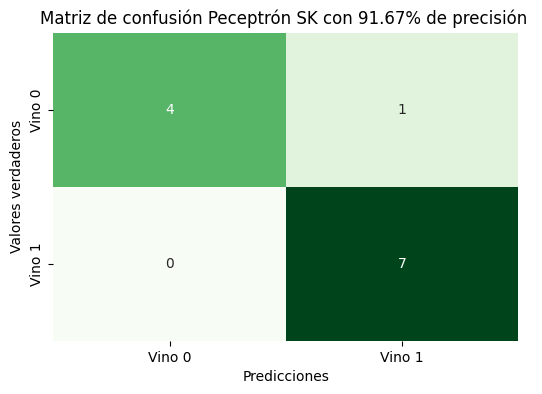

In [ ]:
accurary = accuracy_score(y_val_data,y_prediccion)
cm_2 = confusion_matrix(y_val_data,y_prediccion)

plt.figure(figsize=(6,4))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Greens", cbar=False, xticklabels=["Vino 0", "Vino 1"], yticklabels=["Vino 0", "Vino 1"])
plt.title(f'Matriz de confusión Peceptrón SK con {accurary* 100:.2f}% de precisión ')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()

***1.8 Grafique los datos junto con el plano clasificador ***

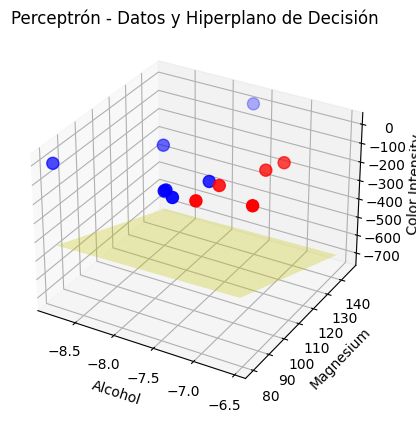

In [ ]:


# Crear una malla para graficar el hiperplano de decisión
xx, yy = np.meshgrid(np.linspace(x_val_data['alcohol'].min(), x_val_data['alcohol'].max(), 100),
                     np.linspace(x_val_data['magnesium'].min(), x_val_data['magnesium'].max(), 100))
zz = -(perceptron.coef_[0][0] * xx + perceptron.coef_[0][1] * yy + perceptron.intercept_[0]) / perceptron.coef_[0][2]

# Graficar los datos y el hiperplano de decisión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colores para las clases
colors = ['red' if label == 0 else 'blue' for label in y_val_data]

# Graficar los puntos de datos
ax.scatter(x_val_data['alcohol'], x_val_data['magnesium'], x_val_data['color_intensity'], c=colors, s=75)

# Graficar el hiperplano de decisión
ax.plot_surface(xx, yy, zz, alpha=0.3, color='yellow')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Color Intensity')
ax.set_title('Perceptrón - Datos y Hiperplano de Decisión')

plt.show()




## **2. Regresión Lineal**

***2.1 Cargue el conjunto de datos "score.csv" que encontrará en Módulo 7***

In [ ]:
import numpy as np                       # NumPy es una librería de Python especializada en el cálculo numérico y el análisis de datos.
import pandas as pd                      # Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.
import seaborn as sns                    # Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib.
from sklearn import datasets             # Herramientas simples y eficientes para el análisis predictivo de datos.

import matplotlib.pyplot as plt          # Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python..

pd.set_option('display.max_columns', None) # Establece el valor de la opción especificada.

%matplotlib inline

In [ ]:
from google.colab import files
uploades = files.upload()

Saving score.csv to score.csv


In [ ]:
score = pd.read_csv("score.csv")
#Se imprime la información de la data


***2.2 Divida la data en dos subconjuntos: Uno de entrenamiento y uno de prueba***

In [ ]:
import random
from sklearn.model_selection import train_test_split # Herramienta que permite segmentar las data en conjuntos

# Dividimos la data
score_t_data, score_val_data = train_test_split(score, test_size=0.2, random_state = 42 )
#Normalizamos la data
score_t_data = (score_t_data - score_t_data.mean()/score_t_data.std())
score_val_data =(score_val_data - score_val_data.mean()/ score_val_data.std())


,Hours,Scores
count,76.000000,76.000000
mean,3.182442,51.860420
std,2.545127,25.238595
min,-1.059664,9.860420
25%,0.915336,27.860420
50%,3.340336,54.360420
75%,5.165336,72.110420
max,7.740336,96.860420


***2.3 Usando los datos de entrenamiento, implemente una aproximación lineal de los datos basado en el algoritmo del perceptrón simple***

In [ ]:

# Definimos los hiperparámetros
alpha = 0.00001 #Tasa o constante de aprendizaje
b = 1 #Bias
epocas = 12000 # Número de veces que el algoritmo de aprendizaje recorrerá todo el conjunto de datos durante su entrenamiento

# Pesos iniciales
W1 = random.uniform(-1, 1) #Generado de forma aleatoria usando random

# Función ecuacion de la recta y = m*x + b
def ecuacion_recta(x,m,b):
    return x * m + b

# Funcion para calculo del error
def errorP(Y_ESPERADA, Y_OBTENIDA):
  return (Y_ESPERADA-Y_OBTENIDA)


def recalcular_peso(Wi,Xi,alpha,y_obtenida, y_esperada):
  Wi += -alpha*(y_obtenida-y_esperada)*Xi
  return Wi

def recalcular_sesgo(b,alpha,y_obtenida, y_esperada):
  return (b-alpha*(y_obtenida-y_esperada))


def entrenar_perceptron(train_data,alpha,W1,b,epocas):

  for i in range(epocas):
    for n in range(train_data.shape[0]):
      X1 = train_data.iat[n,0]

      # calculo de Y aplicando la FUNCION DE ACTIVACIÓN
      y_obtenida = ecuacion_recta(X1,W1,b)

      #SE EXTRAE LA Y QUE SE ESPERA
      y_esperada = train_data.iat[n,1]

     # SE CALCULA EL ERROR
      error = errorP(y_esperada,y_obtenida)

      if error != 0:
        # SE RECALCULAN Y ACTUALIZAN LOS PESOS Y EL SESGO
        W1 = recalcular_peso(W1,X1,alpha,y_obtenida,y_esperada)
        b = recalcular_sesgo(b,alpha,y_obtenida,y_esperada)


  return b, W1


b, W1 = entrenar_perceptron(score_t_data,alpha,W1,b,epocas)

print(f'B: {b}')
print(f'w1: {W1}')


B: 19.99127420059726
w1: 9.947303482283987


***2.4 Usando los datos de prueba, evalue el desempeño del algoritmo usando el error cuadrático medio***

In [ ]:
# Validamos
y_valid = score_val_data['Scores'].values
def predecir(validation_data,alpha,W1,b):
  y_pred=[]
  for n in range(validation_data.shape[0]):
      X1 = validation_data.iat[n,0]
      y_pred.append(ecuacion_recta(X1,W1,b))
  return y_pred

y_pred = predecir(score_val_data,alpha,W1,b)

# Error Cuadrático medio
mse = np.mean((y_valid - y_pred) **2)



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# Crear un gráfico interactivo con plotly
fig = go.Figure()

# Añadir los puntos de datos
fig.add_trace(go.Scatter(x=score_val_data['Hours'], y=score_val_data['Scores'], mode='markers', name='Validacion',fillcolor='yellow'))
fig.add_trace(go.Scatter(x=score_val_data['Hours'], y=y_pred, mode='markers', name='Prediccion',fillcolor='red'))
fig.add_trace(go.Scatter(x=score_t_data['Hours'], y=score_t_data['Scores'], mode='markers', name='Entrenamiento',fillcolor='blue'))
# Añadir la línea de regresión
fig.add_trace(go.Scatter(x=score_val_data['Hours'], y=y_pred, mode='lines', fillcolor='black', name='Línea de Regresión'))

# Añadir anotaciones de MSE, Peso y Sesgo
fig.add_annotation(x=7.5, y=15, text=f'MSE: {mse:.2f}', showarrow=False, font=dict(color="green", size=12))
fig.add_annotation(x=7.5, y=10, text=f'M: {W1:.2f}', showarrow=False, font=dict(color="purple", size=12))
fig.add_annotation(x=7.5, y=5, text=f'b: {b:.2f}', showarrow=False, font=dict(color="orange", size=12))

# Ajustar el diseño del gráfico
fig.update_layout(
    title='Perceptrón - Datos y Línea de Regresión',
    xaxis_title='Hours',
    yaxis_title='Score'
)

# Mostrar el gráfico interactivo
fig.show()

fig2 = go.Figure()

# Añadir los puntos de datos originales
fig2.add_trace(go.Scatter(x=score_val_data['Hours'], y=score_val_data['Scores'], mode='markers', name='Validacion',fillcolor='yellow'))
fig2.add_trace(go.Scatter(x=score_val_data['Hours'], y=y_pred, mode='markers', name='Prediccion',fillcolor='red'))
# Añadir la línea de regresión
fig2.add_trace(go.Scatter(x=score_val_data['Hours'], y=y_pred, mode='lines', fillcolor='black', name='Línea de Regresión'))

# Añadir anotaciones de MSE, Peso y Sesgo
fig2.add_annotation(x=7.5, y=15, text=f'MSE: {mse:.2f}', showarrow=False, font=dict(color="green", size=12))
fig2.add_annotation(x=7.5, y=10, text=f'M: {W1:.2f}', showarrow=False, font=dict(color="purple", size=12))
fig2.add_annotation(x=7.5, y=5, text=f'b: {b:.2f}', showarrow=False, font=dict(color="orange", size=12))

# Ajustar el diseño del gráfico
fig2.update_layout(
    title='Perceptrón - Datos y Línea de Regresión',
    xaxis_title='Hours',
    yaxis_title='Score'
)

fig2.show()

***2.5 Use un regresor lineal de scikit-learn y compare su calidad con la obtenida anteriormente***

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression #Herramienta de Scikit-learn que nos permite implementar un regresor lineal
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Creamos y entrenamos el modelo de regresión lineal

model = LinearRegression()
model.fit(score_t_data[['Hours']],score_t_data['Scores'])

# Extraemos las predicciones
val_predictions = model.predict(score_val_data[['Hours']])

val_mse = mean_squared_error(score_val_data['Scores'],val_predictions)





In [ ]:
import plotly.express as px
import plotly.graph_objects as go
# Crear un gráfico interactivo con plotly
fig3 = go.Figure()

# Añadir los puntos de datos originales
fig3.add_trace(go.Scatter(x=score_val_data['Hours'], y=score_val_data['Scores'], mode='markers', name='Validacion',fillcolor='yellow'))
fig3.add_trace(go.Scatter(x=score_val_data['Hours'], y=val_predictions, mode='markers', name='Prediccion',fillcolor='red'))
fig3.add_trace(go.Scatter(x=score_t_data['Hours'], y=score_t_data['Scores'], mode='markers', name='Entrenamiento',fillcolor='blue'))
# Añadir la línea de regresión
fig3.add_trace(go.Scatter(x=score_val_data['Hours'], y=val_predictions, mode='lines', fillcolor='black', name='Línea de Regresión'))

# Añadir anotaciones de MSE, Peso y Sesgo
fig3.add_annotation(x=7.5, y=15, text=f'MSE: {val_mse:.2f}', showarrow=False, font=dict(color="green", size=12))
fig3.add_annotation(x=7.5, y=10, text=f'M: {W1:.2f}', showarrow=False, font=dict(color="purple", size=12))
fig3.add_annotation(x=7.5, y=5, text=f'b: {b:.2f}', showarrow=False, font=dict(color="orange", size=12))

# Ajustar el diseño del gráfico
fig3.update_layout(
    title='Perceptrón - Datos y Línea de Regresión',
    xaxis_title='Hours',
    yaxis_title='Score'
)

# Mostrar el gráfico interactivo
fig3.show()


# Crear un gráfico interactivo con plotly
fig4 = go.Figure()

# Añadir los puntos de datos originales
fig4.add_trace(go.Scatter(x=score_val_data['Hours'], y=score_val_data['Scores'], mode='markers', name='Validacion',fillcolor='yellow'))
fig4.add_trace(go.Scatter(x=score_val_data['Hours'], y=val_predictions, mode='markers', name='Prediccion',fillcolor='red'))
# Añadir la línea de regresión
fig4.add_trace(go.Scatter(x=score_val_data['Hours'], y=val_predictions, mode='lines', fillcolor='black', name='Línea de Regresión'))

# Añadir anotaciones de MSE, Peso y Sesgo
fig4.add_annotation(x=7.5, y=15, text=f'MSE: {val_mse:.2f}', showarrow=False, font=dict(color="green", size=12))
fig4.add_annotation(x=7.5, y=10, text=f'M: {W1:.2f}', showarrow=False, font=dict(color="purple", size=12))
fig4.add_annotation(x=7.5, y=5, text=f'b: {b:.2f}', showarrow=False, font=dict(color="orange", size=12))

# Ajustar el diseño del gráfico
fig4.update_layout(
    title='Perceptrón - Datos y Línea de Regresión',
    xaxis_title='Hours',
    yaxis_title='Score'
)

# Mostrar el gráfico interactivo
fig4.show()